# Denoising Autoencoder?

A Denoising Autoencoder is a type of autoencoder designed to remove noise from data. It's a variant of the basic autoencoder where the input data is intentionally corrupted with some noise, but the target data that the model is trained to reconstruct is the original, uncorrupted data.

The architecture of a Denoising Autoencoder is similar to a regular autoencoder. It consists of two main parts: an encoder and a decoder. The encoder compresses the input data and the decoder attempts to reconstruct the input from this compressed representation. 

The key difference is in the training process. In a Denoising Autoencoder, the input data is corrupted by adding some noise. The model is then trained to reconstruct the original, uncorrupted data from this noisy input. This forces the autoencoder to learn to remove the noise and recover the underlying structure of the data.

Denoising Autoencoders are often used for tasks such as denoising images or sounds, and can also be used for dimensionality reduction and feature extraction.

# Architecture of  Denoising Autoencoder?

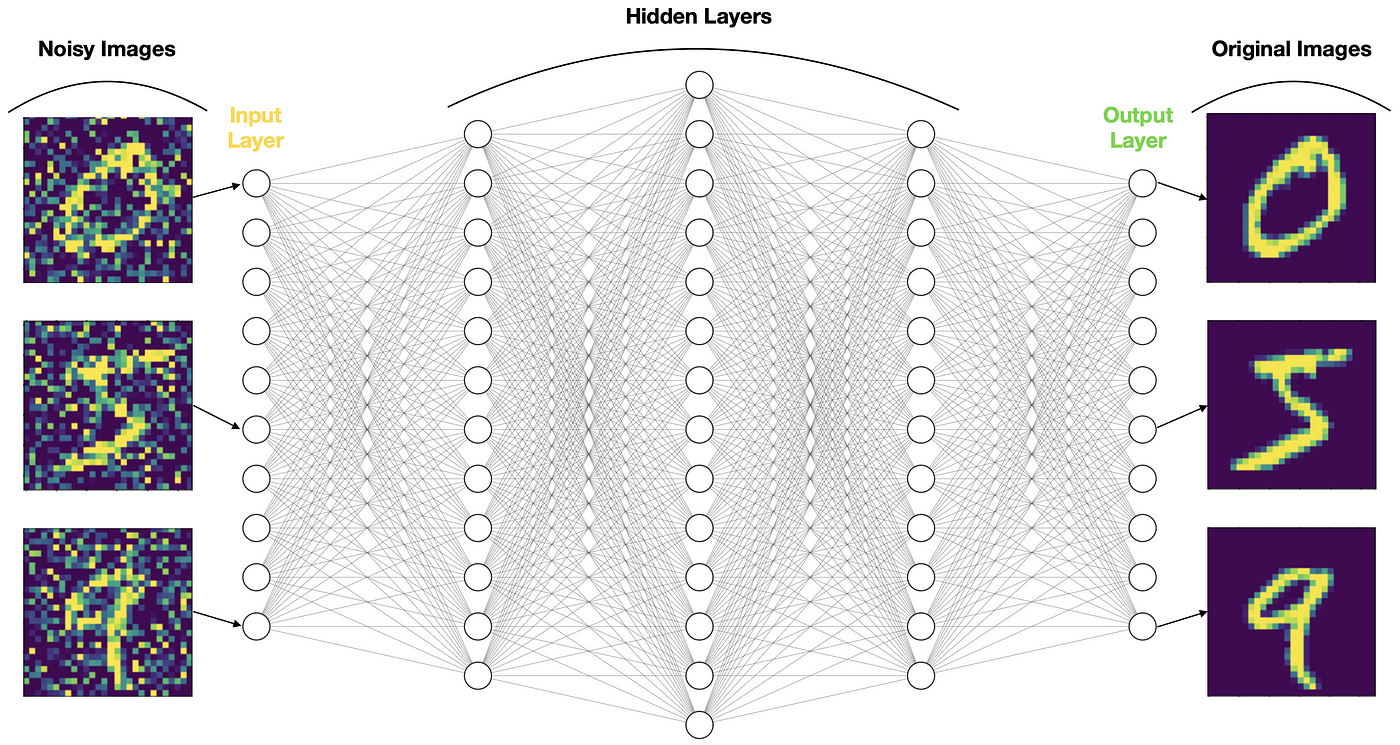

In [1]:
from IPython.display import Image
Image(filename='images/DA.png')

The architecture of a Denoising Autoencoder is similar to a regular autoencoder, with an encoder and a decoder, but with the addition of a noise layer at the input. Here's a high-level overview:

1. **Input Layer (with Noise)**: The input layer takes in the high-dimensional input data. However, unlike a regular autoencoder, the input data is corrupted with some noise before being fed into the autoencoder. The noise can be added in various ways, such as Gaussian noise, masking noise, or salt-and-pepper noise.

2. **Encoder (Hidden Layers)**: The encoder part of the autoencoder transforms the noisy input data into a lower-dimensional representation. The encoder is typically a feed-forward neural network. The goal of the encoder is to learn a compressed representation of the input data that is robust to the added noise.

3. **Decoder (Hidden Layers)**: The decoder part of the autoencoder takes the lower-dimensional representation and transforms it back into the original high-dimensional space. The decoder is typically a feed-forward neural network that is symmetric to the encoder. The goal of the decoder is to reconstruct the original, uncorrupted data from the noisy input.

4. **Output Layer**: The output layer produces the reconstructed, denoised data. The size of the output layer corresponds to the size of the input layer.

The goal of the Denoising Autoencoder is to minimize the difference between the original, uncorrupted data and the reconstructed, denoised data (reconstruction error). This forces the autoencoder to learn to remove the noise and recover the underlying structure of the data.

# Python Code Implementation:

Here's a simple implementation of a Denoising Autoencoder using Keras. This example uses the MNIST dataset and adds Gaussian noise to the images.



In [2]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Clip the images to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

2023-12-26 23:08:19.080959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 23:08:19.428199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-26 23:08:19.430437: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-26 23:08:22.720841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-26 23:08:40.025333: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-12-26 23:08:40.956809: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/100
235/235 [==============================] - 11s 36ms/step - loss: 0.2477 - val_loss: 0.1773
Epoch 2/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1631 - val_loss: 0.1505
Epoch 3/100
235/235 [==============================] - 8s 32ms/step - loss: 0.1456 - val_loss: 0.1393
Epoch 4/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1379 - val_loss: 0.1339
Epoch 5/100
235/235 [==============================] - 6s 26ms/step - loss: 0.1327 - val_loss: 0.1296
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1293 - val_loss: 0.1271
Epoch 7/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1271 - val_loss: 0.1252
Epoch 8/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1250 - val_loss: 0.1235
Epoch 9/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1233 - val_loss: 0.1223
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.12



In this code, Gaussian noise is added to the input images by adding `noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)`. The autoencoder is then trained to reconstruct the original, uncorrupted images from the noisy input.

# How can I evaluate the performance of a Denoising Autoencoder?

Evaluating the performance of a Denoising Autoencoder can be done in several ways:

1. **Reconstruction Error**: The most straightforward way is to compute the reconstruction error on a test set. This is the loss that the autoencoder was trained to minimize, so it gives a direct measure of how well the autoencoder is achieving its training objective.



In [3]:
reconstruction_error = autoencoder.evaluate(x_test_noisy, x_test)
print('Reconstruction error:', reconstruction_error)

313/313 [==============================] - 1s 4ms/step - loss: 0.1077
Reconstruction error: 0.10765242576599121




2. **Visual Inspection**: Another way to evaluate the performance of a Denoising Autoencoder is to visually inspect the denoised outputs. You can compare the noisy input, the denoised output, and the original clean image side by side.



1/1 [==============================] - 0s 44ms/step


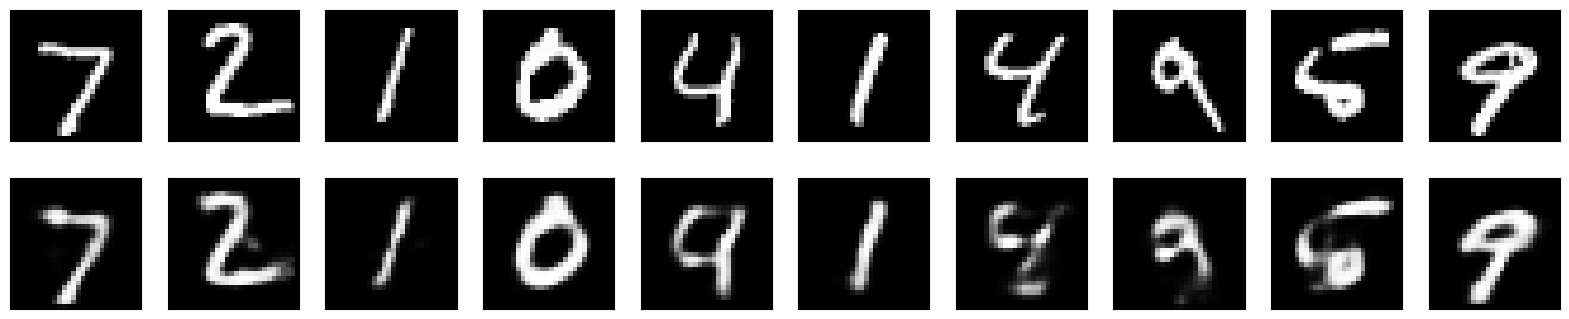

In [4]:
import matplotlib.pyplot as plt
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    denoised_img = autoencoder.predict(x_test_noisy[i].reshape(1, 784))
    plt.imshow(denoised_img.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



3. **Application-Specific Metrics**: If the Denoising Autoencoder is being used as a preprocessing step for another machine learning model, you can evaluate the performance of that model with and without the denoising step. The improvement in performance gives a measure of how useful the Denoising Autoencoder is.

Remember to import matplotlib for the visual inspection:


# How can I use a Denoising Autoencoder for image denoising in a real-world application?

In a real-world application, a Denoising Autoencoder can be used as a preprocessing step to remove noise from images. Here's a step-by-step guide on how you can do this:

1. **Collect a Dataset**: Collect a dataset of clean, noise-free images. If you're working with a specific type of image (e.g., medical images, satellite images), you'll want to collect a dataset of these images.

2. **Add Noise**: Add noise to the images to create a noisy version of your dataset. The type of noise you add should be similar to the noise you expect to see in the real-world application.

3. **Train a Denoising Autoencoder**: Train a Denoising Autoencoder on your dataset. The noisy images are the input and the clean images are the target output. This will train the autoencoder to remove the noise and reconstruct the clean image.



In [ ]:
# Assuming you have loaded and preprocessed your data into `x_train`, `x_test`, `x_train_noisy`, and `x_test_noisy`
input_img = Input(shape=(image_size,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(image_size, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))



4. **Denoise Images**: In your application, you can now use the trained autoencoder to denoise new images. Simply feed the noisy image into the autoencoder and it will output a denoised version of the image.



In [ ]:
def denoise_image(image):
    noisy_image = add_noise(image)  # function to add noise to the image
    denoised_image = autoencoder.predict(noisy_image.reshape(1, image_size))
    return denoised_image.reshape(image_shape)  # reshape to original image shape



5. **Evaluate**: Evaluate the performance of the Denoising Autoencoder on some test images. You can do this by visually inspecting the denoised images, or by using a quantitative measure such as the Mean Squared Error (MSE) between the denoised image and the original clean image.

Remember to replace `image_size` and `image_shape` with the actual size and shape of your images.

# What are the limitations of using a Denoising Autoencoder for image denoising?

While Denoising Autoencoders can be effective for image denoising, they do have some limitations:

1. **Training Data**: Denoising Autoencoders require a large amount of training data to learn effectively. If the training data is not representative of the images that the model will encounter in the real world, the model may not perform well.

2. **Type of Noise**: The model is only as good as the type of noise it was trained on. If the real-world noise is different from the noise used during training, the model may not be able to effectively denoise the images.

3. **Loss of Detail**: While Denoising Autoencoders can remove noise, they can also sometimes remove details from the image that were not noise. This is because the model might interpret these details as noise and remove them during the denoising process.

4. **Computational Cost**: Training a Denoising Autoencoder can be computationally expensive, especially for large images. This can make it impractical for use in some real-world applications where computational resources are limited.

5. **Black Box**: Like many deep learning models, Denoising Autoencoders can be seen as a black box. It can be difficult to understand why the model is making certain decisions, which can be a problem in applications where interpretability is important.

# Application?

Denoising Autoencoders have several applications in various fields:

1. **Image Denoising**: They are commonly used to remove noise from images. This can be particularly useful in fields like medical imaging, where high-quality, noise-free images are crucial for accurate diagnosis.

2. **Signal Processing**: Denoising Autoencoders can be used to remove noise from audio signals, making them useful in applications like speech recognition or music information retrieval.

3. **Anomaly Detection**: By training a Denoising Autoencoder on normal data, it can be used to detect anomalies or outliers. The idea is that the autoencoder will have a high reconstruction error for data that is significantly different from what it was trained on.

4. **Feature Extraction**: The hidden layers of a Denoising Autoencoder can learn to extract useful features from the input data. These features can then be used for other machine learning tasks.

5. **Data Preprocessing**: Denoising Autoencoders can be used as a preprocessing step to clean up noisy data before it is fed into another machine learning model. This can help improve the performance of the subsequent model.

6. **Image Inpainting**: Denoising Autoencoders can be used to fill in missing or corrupted parts of images, a process known as image inpainting.

7. **Data Compression**: Denoising Autoencoders can be used to compress data by learning a compact, noise-free representation of the input data.

# **Thank You!**